Air video

frame # 320

In [1]:
import numpy as np
import cv2

In [3]:
!cd "D:/Interfacial waves resonance videos/0329"


vidcap = cv2.VideoCapture('air/air.mp4')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("air/frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', count )
  count += 1

In [5]:
import matplotlib.pyplot as plt
import numpy as np

Water video

In [8]:
%cd "D:Interfacial waves resonance videos/0329"

D:\Interfacial waves resonance videos\0329


vidcap = cv2.VideoCapture('water/water.mp4')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("oda/frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', count )
  count += 1

Steady interface, salt:


vidcap = cv2.VideoCapture('steady_after/steady_after.mp4')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("steady_after/frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', count )
  count += 1

In [ ]:
vidcap = cv2.VideoCapture('wave/wave.mp4')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("wave/frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', count )
  count += 1

Cutting out the relevant part

In [29]:
import cv2
#air = cv2.flip(cv2.imread("air/frame500.jpg", cv2.IMREAD_GRAYSCALE), -1)
water = cv2.flip(cv2.imread("oda/frame100.jpg", cv2.IMREAD_GRAYSCALE), -1)
img = cv2.flip(cv2.imread("water/frame500.jpg", cv2.IMREAD_GRAYSCALE), -1)

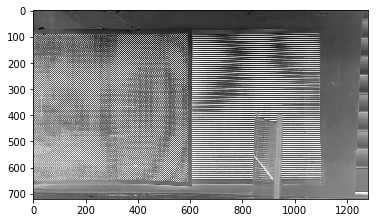

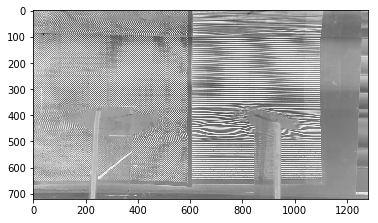

In [30]:
plt.imshow(water, cmap='Greys')
plt.show()
plt.imshow(img, cmap='Greys')

In [31]:
#img = cv2.flip(cv2.imread("wave/frame300.jpg", cv2.IMREAD_GRAYSCALE), -1)
#plt.imshow(img, cmap = 'Greys')
imgcut = img[100:650, 600:800]
refcut = water[100:650, 600:800]


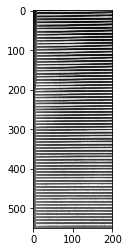

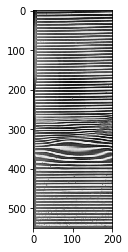

In [32]:
plt.imshow(refcut, cmap = 'Greys')
plt.show()
plt.imshow(imgcut, cmap = 'Greys')


400:600 és 1000:1200

In [14]:
def write_frames(num):
    air = cv2.flip(cv2.imread("air/frame%s.jpg" %num, cv2.IMREAD_GRAYSCALE), -1)
    water = cv2.flip(cv2.imread("water/frame%s.jpg" %num, cv2.IMREAD_GRAYSCALE), -1)
    img = cv2.flip(cv2.imread("salt/frame%s.jpg" %num, cv2.IMREAD_GRAYSCALE), -1)
    cv2.imwrite("air.tif", air)     # save frame as JPEG file      
    cv2.imwrite("water.tif", water)
    cv2.imwrite("salt.tif", img)     # save frame as JPEG file      


In [93]:
img = cv2.flip(cv2.imread("wave/frame5760.jpg", cv2.IMREAD_GRAYSCALE), -1)
cv2.imwrite("wave.tif", img)     # save frame as JPEG file      


True

In [15]:
write_frames(400)

## Line counting

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
refref = refcut[:, 100]
imgref = imgcut[:, 100]

peaksimg, _ = find_peaks(255.-imgref, height=125)
peaks, _ = find_peaks(255.-refref, height=125)

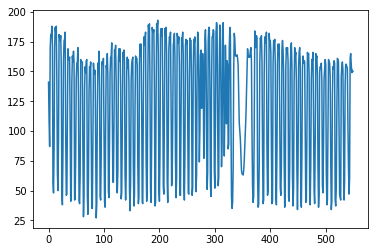

In [35]:
#xplt.plot(refref)
plt.plot(imgref)

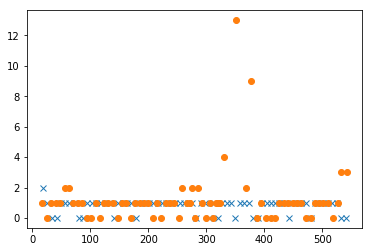

In [26]:
plt.plot(peaksimg[2:], np.abs(np.diff(np.diff(peaksimg))), "x")
plt.plot(peaks[2:], np.abs(np.diff(np.diff(peaks))), "o")

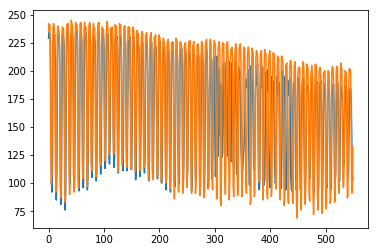

In [67]:
plt.plot(imgref)
plt.plot(refref)

In [82]:
def printMaxAmpl(img, ref, col):
    img = img[150:600, 600:800]
    #ref = ref[180:550, 600:700]
    
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img = clahe.apply(img)
    imgref = img[:,col]
    refref = refcut[:,col]
    peaksimg, _ = find_peaks(255.-imgref, height=200)
    peaks, _ = find_peaks(255.-refref, height=125)
    shorter =  np.min([len(peaksimg), len(peaks)])
    peaksimgcut = peaksimg[:shorter]
    peakscut = peaks[:shorter]
    maxplace = np.argmax(np.abs(np.diff(np.diff(peaksimgcut)) - np.diff(np.diff(peakscut))))
    return [maxplace, np.max(np.abs(np.diff(np.diff(peaksimgcut)) - np.diff(np.diff(peakscut))))]

In [11]:

import openpiv.validation
import openpiv.filters
import openpiv.scaling
import scipy
import openpiv.tools
import openpiv.process
import openpiv.scaling

In [86]:

def printMaxAmpl(img, ref, col):
    img = img[200:600, 600:800]
    #ref = ref[180:550, 600:700]
    cv2.equalizeHist(img)

    imgref = img[:,col]
    refref = ref[:,col]
    peaksimg, _ = find_peaks(255.-imgref, height=125)
    peaks, _ = find_peaks(255.-refref, height=125)
    shorter =  np.min([len(peaksimg), len(peaks)])
    peaksimgcut = peaksimg[:shorter]
    peakscut = peaks[:shorter]
    maxplace = np.argmax(np.abs(np.diff(np.diff(peaksimgcut)) - np.diff(np.diff(peakscut))))
    return [maxplace, np.max(np.abs(np.diff(np.diff(peaksimgcut)) - np.diff(np.diff(peakscut))))]

In [37]:
def read_file(src):
    img = cv2.flip(cv2.imread(src, cv2.IMREAD_GRAYSCALE), -1)
    return img

In [88]:
from scipy import signal
ampls = []
for i in range(0, 8600):
    #print(i)
    img = read_file("water/frame%s.jpg" %i)
    amplsincol = []
    #for j in range(100):
    #    amplsincol.append(printMaxAmpl(img, ref,j)[1])
        #print(printMaxAmpl(img, ref,j)[1])
    #m = np.argmax(np.array(amplsincol))
    ampls.append(printMaxAmpl(img, refcut,100)[0])

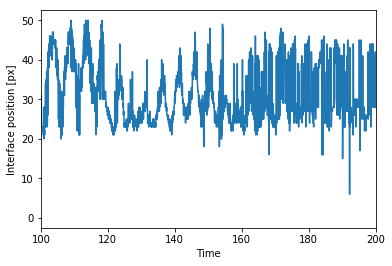

In [145]:
ampls = np.array(ampls)
plt.plot(np.arange(0, ampls.shape[0],1) /22., ampls)
plt.xlabel('Time')
plt.ylabel('Interface position [px]')
plt.xlim(100, 200)
plt.show()


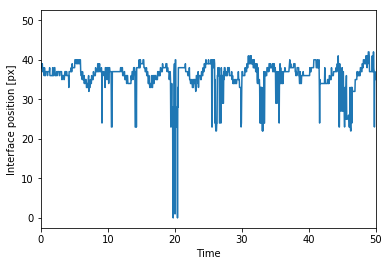

In [90]:
ampls = np.array(ampls)
plt.plot(np.arange(0, ampls.shape[0],1) /22., ampls)
plt.xlabel('Time')
plt.ylabel('Interface position [px]')
plt.xlim(0., 50.)
plt.show()


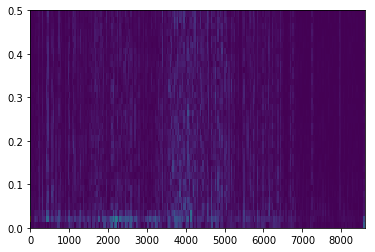

In [152]:
fint, tint, Zxxint = signal.stft(ampls, 1., nperseg=70, detrend='constant')
plt.pcolormesh(tint, fint, np.abs(Zxxint))


C:\Users\balin\Anaconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


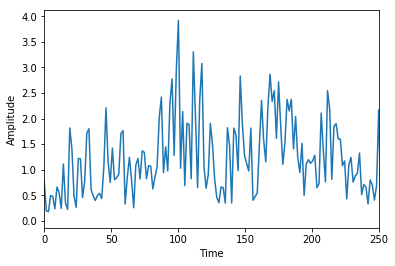

(0.0, 250)

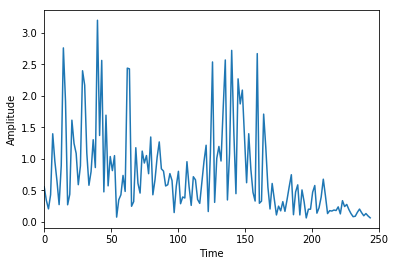

In [155]:
plt.plot(np.arange(0., Zxxint.shape[1], 1)[:-5]*35/22., np.max(Zxxint, axis=0)[:-5])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.xlim(0., 250)
plt.show()
plt.plot(np.arange(0., Zxx.shape[1], 1)[:-5]*35/22., np.max(Zxx, axis=0)[:-5])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.xlim(0., 250)

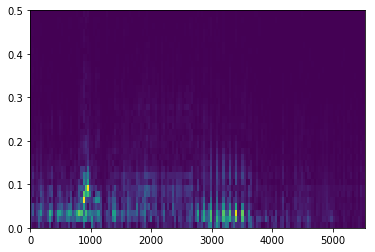

In [156]:
f, t, Zxx = signal.stft(asd[:,1], 1., nperseg=70, detrend='constant')
plt.pcolormesh(t, f, np.abs(Zxx))


In [43]:
np.savetxt('ampls_oda.dat', ampls)

In [50]:
231*22

5082

In [87]:
water = cv2.flip(cv2.imread("oda/frame100.jpg", cv2.IMREAD_GRAYSCALE), -1)
img = cv2.flip(cv2.imread("water/frame5082.jpg", cv2.IMREAD_GRAYSCALE), -1)
cv2.equalizeHist(water)
cv2.equalizeHist(img)

imgcut = img[200:600, 600:800]
refcut = water[200:600, 600:800]
refref = refcut[:, 100]
imgref = imgcut[:, 100]

peaksimg, _ = find_peaks(255.-imgref, height=200)
peaks, _ = find_peaks(255.-refref, height=125)

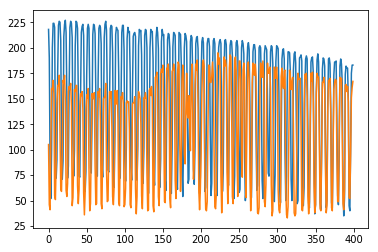

In [79]:
plt.plot(refref)
plt.plot(imgref)

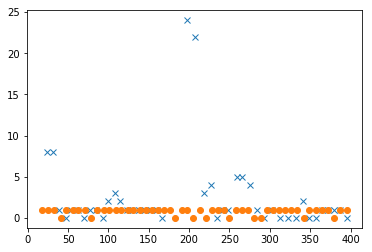

In [80]:
plt.plot(peaksimg[2:], np.abs(np.diff(np.diff(peaksimg))), "x")
plt.plot(peaks[2:], np.abs(np.diff(np.diff(peaks))), "o")

In [148]:
asd = np.loadtxt('asd.dat', skiprows=2)